# Linear Regression in TensorFlow

## 1. Linear Regression

### Problem Statement
Problem: We often hear insurance companies using factors such as number of fire and theft in a neighborhood to calculate how dangerous the neighborhood is. Is it redundant? Is there a relationship between the number of fire and theft in a neighborhood, and if there is, can we find it?

In other words, can we find a function f so that if X is the number of fires and Y is the number of thefts, then: Y = f(X)?

Dataset Description:

Name: Fire and Theft in Chicago 

X = fires per 1000 housing units

Y = thefts per 1000 population within the same Zip code in the Chicago metro area 

Total number of Zip code areas: 42

### Procedure

In [34]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

% matplotlib inline

# data file
DATA_FILE = 'fire_theft.xls'

#### Step 1: read in data from the .xls file

In [29]:
df = pd.read_excel(DATA_FILE, encoding='utf-8')
n_samples = df.shape[0]
data = df.values
print(n_samples)

*** No CODEPAGE record, no encoding_override: will use 'ascii'
42


#### Step2: create placeholders for input X(number of fire) and label Y (number of theft)

In [16]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

#### Step3: create weight and bias, initialized to 0

In [18]:
w = tf.Variable(0.0, name='weight')
b = tf.Variable(0.0, name='bias')

#### Step4: construct model to predict Y (number of theft) from the number of fire

In [21]:
Y_predict = X*w + b

#### Step5: use the square error as the loss function

In [22]:
loss = tf.square(Y - Y_predict, name='loss')

#### Step 6: using gradient descent with learning rate of 0.01 to minimize loss

In [32]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
    # Step7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())
    
    # step 8: train the model
    for i in range(100): # run 100 epochs
        for x, y in data:
            # Session runs train_op to minimize loss
            sess.run(optimizer, feed_dict={X:x, Y:y})
    # Step 9: output the values of w and b
    w_value, b_value = sess.run([w, b])

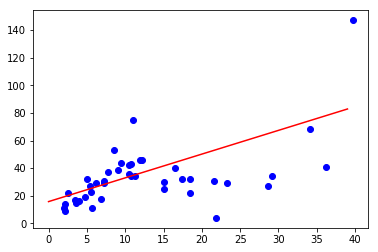

In [45]:
#### Step 10 plot the results
plt.hold
plt.scatter(data[:,0],data[:,1], color='b')
z = lambda x: w_value*x+b_value
plt.plot(range(40), z(range(40)), color='r')

### TensorBoard

![tensoflow_graph.png](images/tensoflow_graph.png)

TensorFlow will execute the part of the graph that those ops depend on. In this case, we see that `train_op` has the purpose of minimize ops, and loss depends on variables $w$ and $b$.

### Optimizers

GradientDescentOptimizer means that our update rule is gradient descent. TensorFlow does auto differentiation for us, then update the values of w and b to minimize the loss. Autodiff is amazing!

By default, the optimizer trains all the trainable variables whose objective function depend on. If there are variables that you do not want to train, you can set the keyword trainable to False when you declare a variable. One example of a variable you don’t want to train is the variable global_step, a common variable you will see in many TensorFlow model to keep track of how many times you’ve run your model.

In [69]:
global_step = tf.Variable(0, trainable=False, dtype=tf.int32) 
learning_rate = 0.01 * 0.99 ** tf.cast(global_step, tf.float32)
increment_step = global_step.assign_add(1)
optimizer = tf.train.GradientDescentOptimizer(learning_rate) # learning rate can be a tensor

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(global_step))
    print(sess.run(learning_rate))
    print(sess.run(increment_step))
    print(sess.run(increment_step))

0
0.01
1
2


### List of optimizers

* tf.train.GradientDescentOptimizer
* tf.train.AdadeltaOptimizer 
* tf.train.AdagradOptimizer 
* tf.train.AdagradDAOptimizer 
* tf.train.MomentumOptimizer
* tf.train.AdamOptimizer 
* tf.train.FtrlOptimizer 
* tf.train.ProximalGradientDescentOptimizer 
* tf.train.ProximalAdagradOptimizer
* tf.train.RMSPropOptimizer


`RMSprop` is an extension of `Adagrad` that deals with its radically diminishing learning rates. It is identical to `Adadelta`, except that `Adadelta` uses the RMS of parameter updates in the numerator update rule. `Adam`, finally, adds bias-correction and momentum to `RMSprop`. Insofar, `RMSprop`, `Adadelta`, and `Adam` are very similar algorithms that do well in similar circumstances. Kingma et al. [15] show that its bias-correction helps `Adam` slightly outperform `RMSprop` towards the end of optimization as gradients become sparser. Insofar, `Adam` might be the best overall choice.”

**TL;DR**: Use AdamOptimizer.

# 2. Logistic Regression in TensorFlow: MNIST

## Problem Statement

The `MNIST` database (Mixed National Institute of Standards and Technology database) is probably one of the most popular databases used for training various image processing systems. It is a database of handwritten digits. The images look like this:

![mnist](images/mnist.png)

Each image is 28 x 28 pixels, flatten to be a 1-d tensor of size 784. Each comes with a label. For example, images on the first row is labelled as 0, the second as 1, and so on. The dataset is hosted on Yann Lecun’s website (http://yann.lecun.com/exdb/mnist/).

### One-hot encoding

One-hot encoding In digital circuits, one-hot refers to a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0).

In this case, one-hot encoding means that if the output of the image is the digit 7, then the output will be encoded as a vector of 10 elements with all elements being 0, except for the element at index 7 which is 1.

### Implementation

In [90]:
import numpy as np 
from tensorflow.examples.tutorials.mnist import input_data

# Step 1: Read in data 
# using TF Learn's built in function to load MNIST data to the folder data/mnist 
# MNIST = input_data.read_data_sets("mnist", one_hot=True)

# Step 2: Define parameters for the model 
learning_rate = 0.01 
batch_size = 128 
n_epochs = 25

# Step 3: create placeholders for features and labels 
# each image in the MNIST data is of shape 28*28 = 784 
# therefore, each image is represented with a 1x784 tensor 
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each label is one hot vector.

X = tf.placeholder(tf.float32, [batch_size, 784]) 
Y = tf.placeholder(tf.float32, [batch_size, 10])

# Step 4: create weights and bias 
# w is initialized to random variables with mean of 0, stddev of 0.01 
# b is initialized to 0 
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w) 
# shape of b depends on Y 
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name="weights") 
b = tf.Variable(tf.zeros([1, 10]), name="bias")

# Step 5: predict Y from X and w, b 
# the model that returns probability distribution of possible label of the image 
# through the softmax layer 
# a batch_size x 10 tensor that represents the possibility of the digits 
logits = tf.matmul(X, w) + b

# Step 6: define loss function 
# use softmax cross entropy with logits as the loss function 
# compute mean cross entropy, softmax is applied internally 
entropy = tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits) 
loss = tf.reduce_mean(entropy) # computes the mean over examples in the batch

# Step 7: define training op 
# using gradient descent with learning rate of 0.01 to minimize cost 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init) 
    n_batches = int(MNIST.train.num_examples/batch_size) 
    for i in range(n_epochs): # train the model n_epochs times for _ in range(n_batches):
        X_batch, Y_batch = MNIST.train.next_batch(batch_size) 
        print(sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}))
    # average loss should be around 0.35 after 25 epochs
    
    # test the model 
    n_batches = int(MNIST.test.num_examples/batch_size) 
    total_correct_preds = 0 
    for i in range(n_batches):
        X_batch, Y_batch = MNIST.test.next_batch(batch_size) 
        _, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y:Y_batch}) 
        preds = tf.nn.softmax(logits_batch) 
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
        accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) # similar to numpy.count_nonzero(boolarray) :(
        total_correct_preds += sess.run(accuracy)
    
    print("Accuracy {0}".format(total_correct_preds/MNIST.test.num_examples))

[None, 2.3031328]
[None, 2.2859359]
[None, 2.2878366]
[None, 2.2709088]
[None, 2.2592759]
[None, 2.2387748]
[None, 2.2431116]
[None, 2.2036476]
[None, 2.2120895]
[None, 2.204885]
[None, 2.1988001]
[None, 2.187006]
[None, 2.1816993]
[None, 2.1794415]
[None, 2.143878]
[None, 2.1666057]
[None, 2.1246254]
[None, 2.1375103]
[None, 2.1084881]
[None, 2.0930595]
[None, 2.1304812]
[None, 2.0817747]
[None, 2.0906787]
[None, 2.1002779]
[None, 2.0839019]
Accuracy 0.744


## Using Neural Network

In [ ]:
# load data
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

In [72]:
# open interactive session
import tensorflow as tf
# If you are not using an InteractiveSession, 
# then you should build the entire computation graph before starting a session and launching the graph.
sess = tf.InteractiveSession()

In [73]:
# set up variables and initialize
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())

In [74]:
# Compute cross entropy

y = tf.matmul(x,W) + b
# tf.nn.softmax_cross_entropy_with_logits internally applies the softmax on the model's unnormalized model prediction and sums across all classes
# tf.reduce_mean takes the average over these sums.
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [75]:
# use steepest gradient descent, with a step length of 0.5, to descend the cross entropy
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

for _ in range(1000):
    # load 100 training examples in each training iteration
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})


In [76]:
# check if our prediction matches the truth.
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

# cast to floating point numbers and then take the mean
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# accueacy
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9171


In [79]:
## Weight Initialization
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
    # Computes a 2-D convolution given 4-D input and filter tensors.
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # Performs the max pooling on the input.
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

# First Convolutional Layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1, 28, 28, 1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# Second Convolutional Layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


# Densely Connected Layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Readout Layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

# Train and Evaluate the Model
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(400):
    batch = mnist.train.next_batch(50)
    if i % 100 == 0:
      train_accuracy = accuracy.eval(feed_dict={
          x: batch[0], y_: batch[1], keep_prob: 1.0})
      print('step %d, training accuracy %g' % (i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

  print('test accuracy %g' % accuracy.eval(feed_dict={
      x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.16
step 100, training accuracy 0.88
step 200, training accuracy 0.94
step 300, training accuracy 0.96


KeyboardInterrupt: 